<a href="https://colab.research.google.com/github/kaviya-srikumar/data-science/blob/master/projectday5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sk-learn
from sklearn.preprocessing import StandardScaler #preprocessing
from sklearn.model_selection import train_test_split #Splitting the data into test and train
from sklearn.linear_model import LinearRegression #Model Selection - Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error #Evaluation Metrics
from sklearn.model_selection import GridSearchCV #validation - Grid search
import joblib #dummy model

In [32]:
df= pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv (1).zip")

In [33]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [ ]:
print(df.shape[0])
print(df.shape[1])

48204
9


In [34]:
df.describe()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [36]:
df.dtypes

,0
traffic_volume,int64
holiday,object
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,object


In [37]:
missing_values = df.isnull().sum()
print(missing_values)

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64


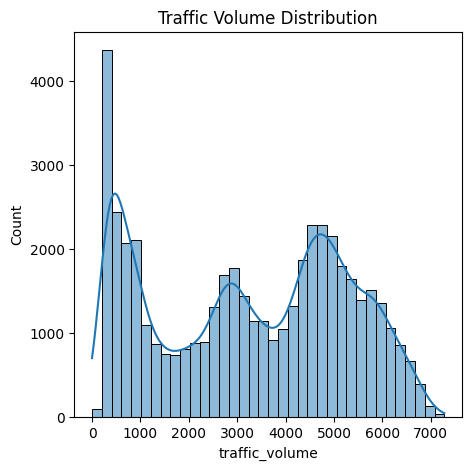

In [38]:
plt.figure(figsize=(5,5))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Traffic Volume Distribution')
plt.show()

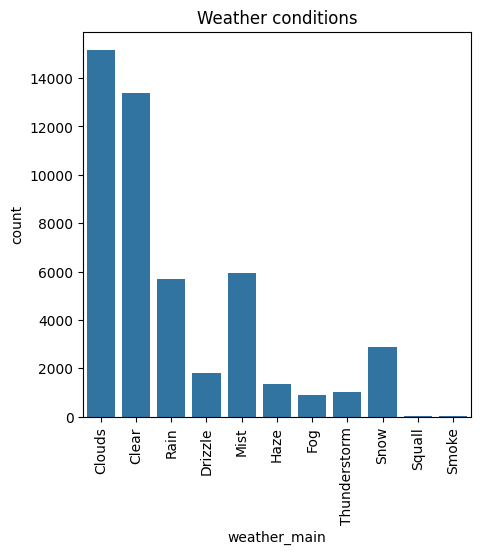

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'weather_main',data=df)
plt.title('Weather conditions')
plt.xticks(rotation = 90)
plt.show()

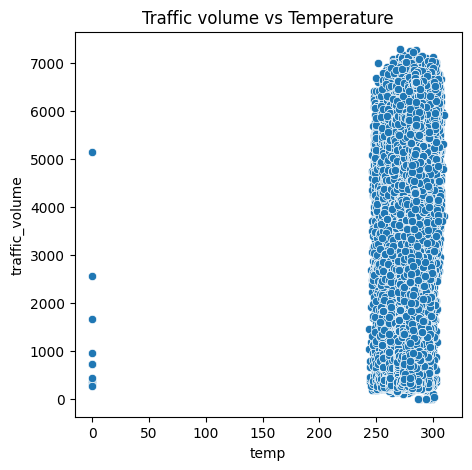

In [40]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'temp',y="traffic_volume",data=df)
plt.title('Traffic volume vs Temperature')
plt.show()

In [41]:
# feature engineering splitting date and time to predict the traffic on certain period of time
df['data_time'] = pd.to_datetime(df['date_time'],dayfirst=True)

#extract features from "data_time"
df['hour'] = df['data_time'].dt.hour
df['day_of_week'] = df['data_time'].dt.dayofweek
df['month']=df['data_time'].dt.month

In [42]:
df = pd.get_dummies(df, columns=['weather_main', 'weather_description', 'holiday'])

In [43]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features and the target
X = df.drop(['traffic_volume', 'date_time'], axis=1)
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()



# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the testing data
y_pred = lr.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1580.9714780858649
Mean Squared Error (MSE): 3263398.439714135
Root Mean Squared Error (RMSE): 1806.4878742228343


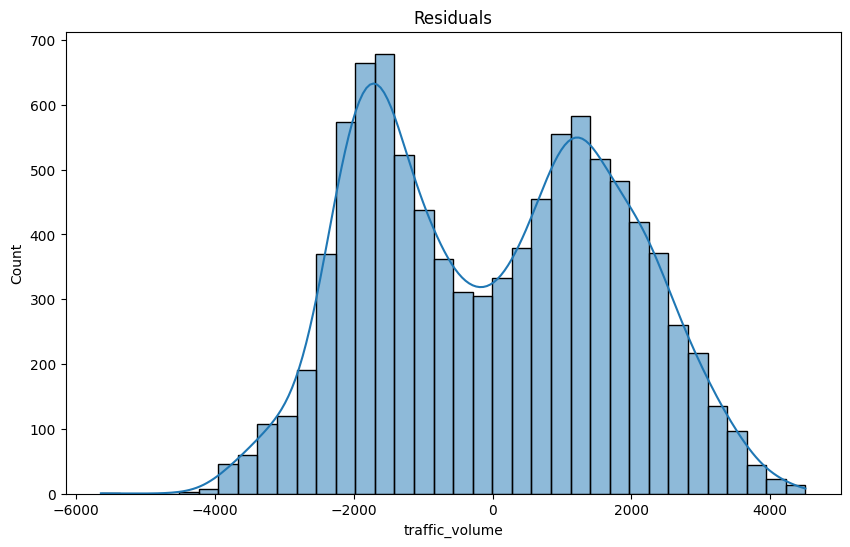

In [51]:
#Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.show()#

In [52]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'fit_intercept': [True, False]}

# Initialize the Grid Search model
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [53]:
# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'fit_intercept': True}
Best score: -8685928.843936067


In [54]:
# Import necessary library
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'traffic_volume_model.pkl')

['traffic_volume_model.pkl']

In [55]:
# Load the model
loaded_model = joblib.load('traffic_volume_model.pkl')

# Use the model for prediction
# Here, we are using the first 10 rows of the testing data for demonstration
sample_data = X_test.iloc[:10]
predictions = loaded_model.predict(sample_data)

# Print the predictions
print(predictions)

[2361.08626849 4305.22670354 2882.90719904 4247.88290095 2503.453391
 3770.5803464  4025.88788594 2454.42729572 3361.71424579 3579.54766829]
